## Autoenkoder splotowy

### Importy

In [1]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

Zbiorek danych

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Modelik autoenkoderka

In [9]:
#autoencoder = Sequential(name='autoencoder')
encoder=Sequential(name='encoder')
decoder=Sequential(name='decoder')
# siec enkodera
encoder.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
encoder.add(MaxPooling2D(2, padding= 'same'))
encoder.add(Conv2D(15, 3, activation= 'relu', padding='same'))
encoder.add(MaxPooling2D(2, padding= 'same'))
# siec dekodera
decoder.add(Conv2D(15, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(30, 3, activation= 'relu', padding='same'))
decoder.add(UpSampling2D(2))
decoder.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output 
autoencoder=Sequential([encoder, decoder])
#autoencoder.add(encoder)
#autoencoder.add(decoder)
autoencoder.compile(optimizer= 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 7, 7, 15)          4365      
                                                                 
 decoder (Sequential)        (None, 28, 28, 1)         6391      
                                                                 
Total params: 10,756
Trainable params: 10,756
Non-trainable params: 0
_________________________________________________________________


In [14]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
Total params: 4,365
Trainable params: 4,365
Non-trainable params: 0
_________________________________________________________________


In [15]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 30)        4080      
                                                                 
 up_sampling2d_5 (UpSampling  (None, 28, 28, 30)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 1)         271       
                                                                 
Total params: 6,391
Trainable params: 6,391
Non-trainable p

In [16]:
history=autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 74s 158ms/step - loss: 0.0709 - val_loss: 0.0699
Epoch 2/15
469/469 [==============================] - 78s 167ms/step - loss: 0.0703 - val_loss: 0.0695
Epoch 3/15
469/469 [==============================] - 73s 155ms/step - loss: 0.0698 - val_loss: 0.0690
Epoch 4/15
469/469 [==============================] - 72s 155ms/step - loss: 0.0694 - val_loss: 0.0687
Epoch 5/15
469/469 [==============================] - 73s 156ms/step - loss: 0.0691 - val_loss: 0.0686
Epoch 6/15
469/469 [==============================] - 72s 153ms/step - loss: 0.0688 - val_loss: 0.0682
Epoch 7/15
469/469 [==============================] - 71s 152ms/step - loss: 0.0685 - val_loss: 0.0679
Epoch 8/15
469/469 [==============================] - 79s 169ms/step - loss: 0.0683 - val_loss: 0.0676
Epoch 9/15
469/469 [==============================] - 75s 161ms/step - loss: 0.0681 - val_loss: 0.0675
Epoch 10/15
469/469 [==============================] - 73s 155ms/step - l

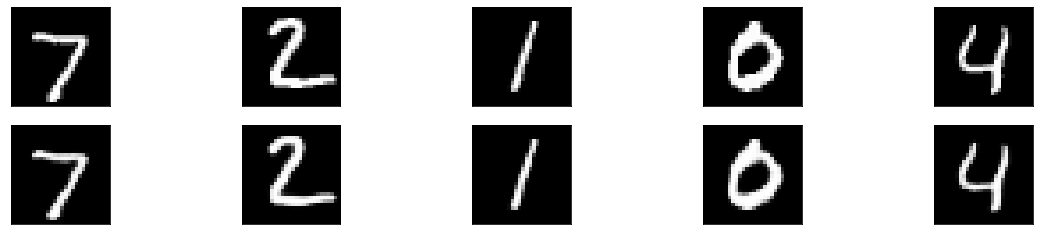

In [18]:
pred = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # oryginalne obrazy ze zbioru testowego
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # rekonstrukcje obrazow z autoenkodera
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
code=encoder.predict(x_test)

In [29]:
code.shape

(10000, 7, 7, 15)

In [30]:
code[0][0]

array([[0.40547284, 0.        , 0.39183855, 0.        , 0.        ,
        0.00222451, 0.63598937, 0.62034565, 0.10092285, 0.00292763,
        0.03599442, 1.0206823 , 0.32902303, 0.6192772 , 0.9448194 ],
       [0.40547284, 0.        , 0.39183855, 0.        , 0.        ,
        0.00222451, 0.63426214, 0.62034565, 0.00675456, 0.00292763,
        0.03392474, 1.0206823 , 0.32902303, 0.6192772 , 0.9448194 ],
       [0.40547284, 0.        , 0.39183855, 0.        , 0.        ,
        0.00222451, 0.63426214, 0.62034565, 0.00675456, 0.00292763,
        0.03392474, 1.0206823 , 0.32902303, 0.6192772 , 0.9448194 ],
       [0.40547284, 0.        , 0.39183855, 0.        , 0.        ,
        0.00222451, 0.63426214, 0.62034565, 0.00675456, 0.00292763,
        0.03392474, 1.0206823 , 0.32902303, 0.6192772 , 0.9448194 ],
       [0.40547284, 0.        , 0.39183855, 0.        , 0.        ,
        0.00222451, 0.63426214, 0.62034565, 0.00675456, 0.00292763,
        0.03392474, 1.0206823 , 0.32902303, 

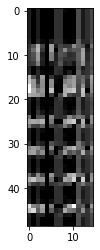

In [38]:
plt.imshow(code[0].reshape(-1).reshape(49,15))

In [39]:
loss=history.history['loss']
epoch=history.epoch

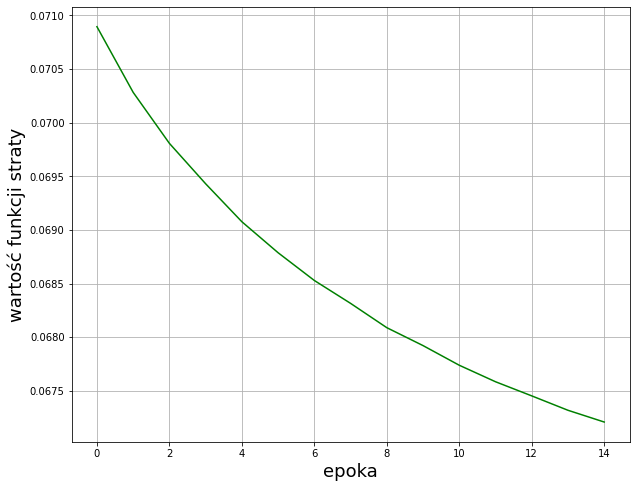

In [40]:
fig = plt.figure(figsize=(10,8))
plt.plot(epoch, loss, 'g')
plt.ylabel("wartość funkcji straty", fontsize=18)
plt.xlabel("epoka", fontsize=18)
plt.grid(True)
plt.show()

In [41]:
autoencoder.save_weights('conv_autoencoder.h5')